In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ibm = pd.read_csv('ibm.csv')

## Análise de atrição e desempenho de funcionários

Ter a capacidade de contratar, treinar e manter um corpo de funcionários competente e capacitado é uma das peças mais importantes dentro do esquema de uma empresa. Para estimular seus talentos a permanecerem exercendo suas atividades atuais, a empresa deve elaborar uma estratégia de retenção de funcionários.

Uma empresa que possui uma estratégia bem definida nesse aspecto cria um ambiente de trabalho mais saudável e motiva seus colaboradores a gerarem resultados. Uma regularidade maior no corpo de funcionários pode gerar alguns benefícios:

- maior qualidade nas entregas
- maior engajamento das equipes
- redução de gastos com demissões
- maior entrosamento interno
- fortalecimento do capital intelectual

Esse é um dataset fictício criado por cientistas de dados da IBM com diversos dados de quase 1500 colaboradores. Como o objetivo geral de uma empresa deve ser manter seus talentos e fortalecer seu capital intelectual, essa análise busca entender quais fatores levam a uma maior insatisfação por parte dos colaboradores, permitindo que a empresa intervenha em determinados aspectos.

- IBM HR Analytics Employee Attrition & Performance
- https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

### Características e formato

Linhas e colunas

In [3]:
ibm.shape

(1470, 35)

Nomes de coluna

In [4]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Tipo de variável por coluna

In [5]:
ibm.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                       int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Primeiras 10 linhas

In [6]:
ibm.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,1,8,...,High,80,0,8,2,Good,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,...,Low,80,3,12,3,Good,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,1,11,...,Medium,80,1,1,2,Better,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,Bachelor,Life Sciences,1,12,...,Medium,80,0,10,2,Better,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,1,13,...,Medium,80,2,17,3,Good,7,7,7,7


Resumo das variáveis numéricas

In [7]:
ibm.describe()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,...,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,1.0,1024.865306,65.891156,2.063946,6502.931293,14313.103401,...,0.282993,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,0.0,602.024335,20.329428,1.106940,4707.956783,7117.786044,...,0.450606,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1009.000000,2094.000000,...,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,1.0,491.250000,48.000000,1.000000,2911.000000,8047.000000,...,0.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,1.0,1020.500000,66.000000,2.000000,4919.000000,14235.500000,...,0.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,3.000000,8379.000000,20461.500000,...,1.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,5.000000,19999.000000,26999.000000,...,1.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Checagem de valores nulos

In [8]:
ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Contagem de valores únicos por coluna

In [9]:
ibm.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

As colunas 'EmployeeCount', 'Over18' e 'StandardHours' possuem apenas um valor cada, enquanto a coluna 'Employee Number' possui 1470 valores diferentes. Por esse motivo, nenhuma dessas colunas serão úteis na análise e serão retiradas do DataFrame.

In [10]:
ibm.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

### Histograma de visão geral

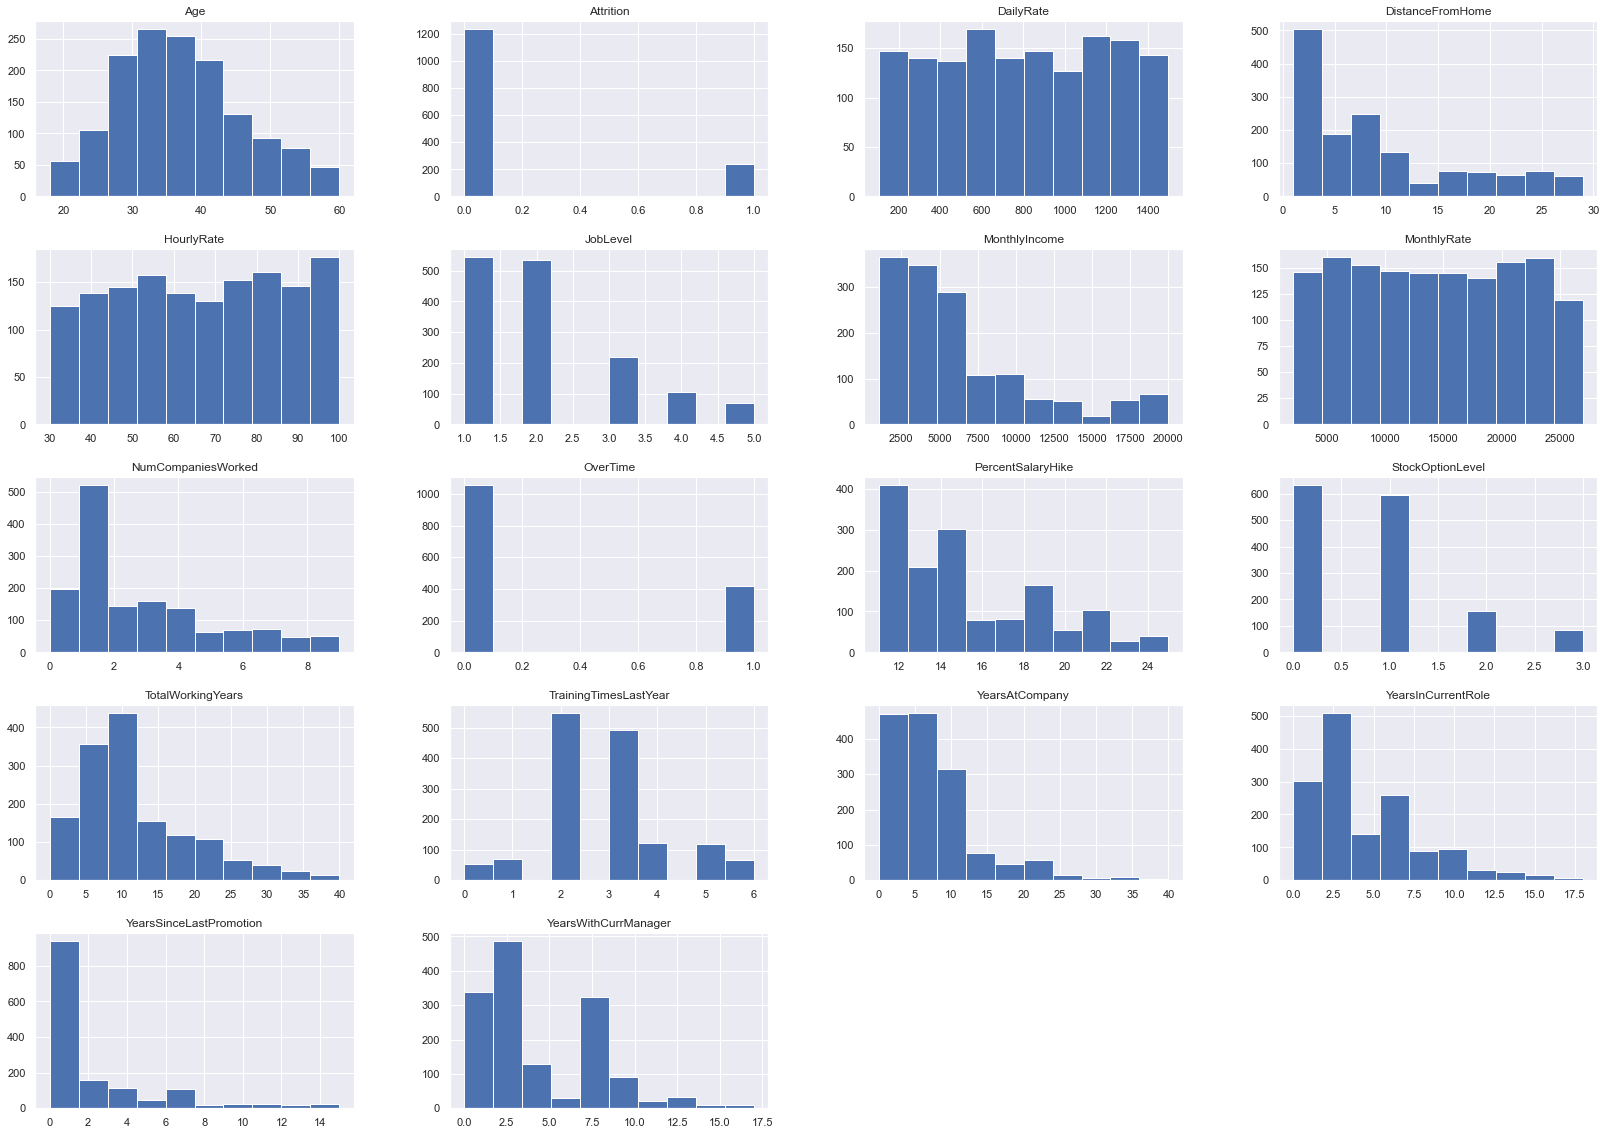

In [11]:
ibm.hist(figsize=(28,20));

Em uma breve análise inicial, apenas olhando os histogramas gerados, é possível tecer alguns comentários:
- A faixa etária mais presente na empresa é entre 30 e 40 anos
- Uma porcentagem muito grande do corpo de funcionários mora perto da empresa
- A maioria das pessoas trabalharam em no máximo 1 empresa além da IBM
- Quase todos os colaboradores realizaram treinamentos no ano anterior à coleta dos dados
- Seguindo uma tendência parecida com a faixa etária, a maioria das pessoas têm, no máximo, 10 anos de carreira
- Mais de um terço dos funcionários trabalharam horas extras

## Análises de atrição

### Criação de DataFrames adicionais para análise

In [12]:
# DataFrame de atrição positiva (quando a coluna 'Attrition' = 1)
ibm_y = ibm[(ibm['Attrition'] == 1)]

# DataFrame de atrição positiva (quando a coluna 'Attrition' = 0)
ibm_n = ibm[(ibm['Attrition'] == 0)]

#### Relação de atrição e idade

In [13]:
age_att = px.box(ibm, x="Attrition", y="Age")
age_att.show()

- Mediana de não-atrição: 36
- Mediana de atrição: 32

Percebemos que a idade é um fator importante na atrição de um colaborador, inclusive classificando como outliers dois funcionários insatisfeitos aos 56 e 58 anos. Uma possível explicação para isso é a mudança de comportamento corporativo de uma pessoa ao longo de sua carreira: pessoas mais jovens tendem a explorar suas opções de carreira, enquanto os mais velhos buscam por maior estabilidade em um mesmo emprego.

#### Relação de atrição e departamento

In [14]:
dept_y = ibm_y.groupby('Department')['Department'].count()
dept = ibm.groupby('Department')['Department'].count()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=dept_y.index, values=dept_y.values, name="Attrition"), 1, 1)
fig.add_trace(go.Pie(labels=dept.index, values=dept.values, name="Total"), 1, 2)
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Department attrition analysis",
    annotations=[dict(text='Attrition = Yes', x=0.155, y=-0.2, font_size=15, showarrow=False),
                 dict(text='All employees', x=0.855, y=-0.2, font_size=15, showarrow=False)])
fig.show()

Essa comparação nos permite perceber dois departamentos em situações opostas. O departamento de P&D está no lado positivo da comparação: possui 65% do total de funcionários da empresa mas "apenas" 56% dos insatisfeitos. No lado negativo, temos Vendas, que se destaca muito mais no gráfico de atrição: nesse departamento trabalham 30% dos funcionários da empresa, mas ele representa quase 39% dos insatisfeitos.

In [15]:
dept_att = ibm.groupby('Department')['Attrition'].value_counts()
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['No', 'Yes'], values=[dept_att[0], dept_att[1]], name="HR"), 1, 1)
fig.add_trace(go.Pie(labels=['No', 'Yes'], values=[dept_att[2], dept_att[3]], name="R&D"), 1, 2)
fig.add_trace(go.Pie(labels=['No', 'Yes'], values=[dept_att[4], dept_att[5]], name="Sales"), 1, 3)
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Attrition inside departments",
    annotations=[dict(text='Human Resources', x=0.072, y=-0.2, font_size=15, showarrow=False),
                 dict(text='Research & Development', x=0.5, y=-0.2, font_size=15, showarrow=False),
                 dict(text='Sales', x=0.872, y=-0.2, font_size=15, showarrow=False)])
fig.show()

Esse gráfico analisa a relação atrito-departamento no sentido contrário, exibindo a porcentagem de atrição dentro de cada departamento. As tendências da análise anterior, no entanto, se repetem.
- O departamento de Vendas é o destaque negativo, com 20.6% de seus funcionários se mostrando insatisfeitos
- O departamento de P&D é o destaque positivo, com o menor índice de insatisfação entre os 3 analisados (13.8%)

#### Relação de atrição e distância casa-trabalho

In [16]:
fig = px.box(ibm, x="Attrition", y="DistanceFromHome")
fig.show()

O box plot nos ajuda a avaliar o impacto da distância casa-trabalho na insatisfação de um funcionário:
- Mediana de não atrição: 7
- Mediana de atrição: 9 (+28.6%)

Também é possível perceber a grande concentração dos valores relativos aos funcionários satisfeitos. 75% deles moram a menos de 13km da empresa, enquanto seus colegas mais distantes percorrem mais que o dobro: 29km.

#### Relação de atrição e gênero

In [17]:
gender = ibm.groupby('Gender')['Gender'].count()
print('Proporção de mulheres na empresa:', '{:.0%}'.format((gender[0]/(gender[0]+gender[1]))))
print('Proporção de homens na empresa:', '{:.0%}'.format((gender[1]/(gender[0]+gender[1]))))
fig = px.histogram(ibm, x="Gender", color="Attrition", text_auto=True, histnorm='percent', nbins=2)
fig.show()

Proporção de mulheres na empresa: 40%
Proporção de homens na empresa: 60%


Os homens representam 63.3% dos insatisfeitos, mas esse dado pode ser enganoso na análise do impacto do gênero na atrição, uma vez que os homens são 60% do corpo de funcionários.

#### Relação de atrição e nível do cargo

In [18]:
fig = px.histogram(ibm, x="JobLevel", color="Attrition", text_auto=True)
fig.show()

A proporção de insatisfeitos segue o nível do cargo, com o nível 1 tendo a maior taxa de atrição: 26,3%

#### Relação de atrição e salário

In [19]:
income = px.box(ibm, x="Attrition", y="MonthlyIncome")
income.show()

O salário é claramente um dos fatores mais impactantes na existência ou não de atrição do trabalhador, com o modelo classificando como outliers os 10 funcionários insatisfeitos com salários acima de 11 mil.
- Mediana de atrição: 3202
- Mediana de não-atrição: 5204
- Uma diferença extremamente notável de 62.5%!

#### Relação de atrição e número de experiências profissionais

In [20]:
# ncw = px.histogram(ibm, x="NumCompaniesWorked", color="Attrition", text_auto=True)
# ncw.show()

fig = px.histogram(ibm, x="NumCompaniesWorked", color="Attrition", barmode='group', height=400, barnorm='percent', text_auto=True)
fig.show()

As maiores taxas de atrição estão entre os funcionários com 5 ou mais experiências profissionais na carreira (com exceção de x=8), o que pode significar que esse perfil de profissional está mais disposto a trocar de cargos.

#### Relação de atrição e horas extras

In [24]:
ot = ibm.groupby('OverTime')['Attrition'].value_counts()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['No attrition','Attrition'], values=ot[0], name="No overtime"), 1, 1)
fig.add_trace(go.Pie(labels=['No attrition','Attrition'], values=ot[1], name="Overtime"), 1, 2)
fig.update_traces(hole=0.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="Analysis of attrition due overtime",
    annotations=[dict(text='No overtime', x=0.173, y=-0.2, font_size=15, showarrow=False),
                 dict(text='Overtime', x=0.815, y=-0.2, font_size=15, showarrow=False)])
fig.show()

A variável referente às horas extras provavelmente representará, dentre todas, a com maior correlação com atrição. Não é possível traçar exatamente a curva de impacto da quantidade de horas extras, uma vez que a coluna OverTime é binária. Ainda assim, a diferença de atrição se mostra notável no gráfico. A proporção de funcionários insatisfeitos quase triplica - de 10.4% para 30.5% - dos que trabalharam sua carga normal para os que realizaram horas extras.

## Análise de correlação entre atrição e demais variáveis

In [22]:
corr = ibm.corr().unstack().sort_values(ascending=False)
corr = pd.DataFrame(corr).reset_index()
corr.columns = ['Var_A', 'Var_B', 'Corr']
corr.query("Var_A == 'Attrition' & Var_B != 'Attrition'")

,Var_A,Var_B,Corr
70,Attrition,OverTime,0.246118
84,Attrition,DistanceFromHome,0.077924
93,Attrition,NumCompaniesWorked,0.043494
137,Attrition,MonthlyRate,0.015170
213,Attrition,HourlyRate,-0.006846
231,Attrition,PercentSalaryHike,-0.013478
273,Attrition,YearsSinceLastPromotion,-0.033019
295,Attrition,DailyRate,-0.056652
296,Attrition,TrainingTimesLastYear,-0.059478
308,Attrition,YearsAtCompany,-0.134392


## Conclusão

A base de dados fornecia quase 20 dados diferentes sobre cada funcionário e por isso foi necessário gerar algumas visualizações para compreender melhor o impacto de cada variável. Essas diferentes visualizações, entretanto, geraram algumas conclusões interessantes.

A idade foi uma variável com relações fortes com a atrição. Não é possível cravar que seja esse o motivo, mas uma possível explicação é a mudança de pensamento profissional de acordo com a idade. No início de uma carreira, as pessoas costumam estar mais dispostas a assumir riscos e explorar oportunidades, facilitando o surgimento de insatisfações no cargo atual. Com o tempo e amadurecimento, a tendência profissional é buscar maior estabilidade, permanecendo um tempo maior na instituição.

Também foi possível perceber outras relações naturais de surgimento de insatisfação, como a distância casa-trabalho. A base de dados, por ser fictícia, não retrata uma cidade ou país específico, mas essa relação é forte em cidades grandes. Trazendo a análise para o Brasil, cidades como São Paulo e Rio de Janeiro sofrem com constantes problemas de transporte público e engarrafamentos em horários de pico. Distâncias relativamente curtas, como 4 ou 5 quilômetros, podem exigir muito tempo de deslocamento. Isso pode causar um duplo efeito negativo na pessoa que realiza esse percurso: o estresse gerado pelo caos urbano e a decepção causada pelo tempo perdido. Quanto mais tempo é perdido nos percursos de ida e volta, menos tempo livre a pessoa terá.

Apesar das relações citadas serem evidentes pelos gráficos, a IBM não tem uma solução fácil. Não é possível mudar a idade de um funcionário e não é fácil trazer seu trabalhador para mais perto da sede. A análise, no entanto, gera alguns pontos que a IBM poderia agir. Um exemplo disso é a análise de atrição por departamento, onde temos departamentos em situações opostas. O departamento de Pesquisa e Desenvolvimento é o exemplo interno a ser seguido: "apenas" 13.8% dos funcionários dessa área estão insatisfeitos. Os outros dois setores possuem taxas de insatisfação cerca de 50% maiores (19% e 20.6%) e são uma oportunidade de intervenção. O banco de dados por si só não permite chegar a uma conclusão, mas nos possibilita afirmar que há necessidade de uma investigação detalhada. O que o departamento de P&D têm feito para manter seus funcionários felizes? Talvez essa resposta possa ser aplicada nos outros setores.

Outra relação que a IBM pode aliviar é a realização de horas extras. É a variável com a correlação mais forte dentre todas e o raciocínio é básico. Uma rotina de trabalho e deslocamento, por vezes, já é muito desgastante. O cenário piora ainda mais quando o período de trabalho é ampliado. A análise mostrou que a realização de horas extras pode triplicar a chance de um funcionário se mostrar insatisfeito.

A empresa, nesse caso, deveria buscar agir nas frentes em que pode. Nos exemplos citados acima, as intervenções seriam nos departamentos e nas horas extras. Investigar um caso que está dando certo e aplicar em outros cenários é sempre uma boa ideia e poderia ajudar a aumentar a satisfação dos funcionários, consequentemente motivando-os a permanecer na IBM, construindo uma equipe cada vez mais forte, capacitada e motivada a entregar o melhor em nome da empresa.